In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score  
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fish-species-sampling-weight-and-height-data/fish_data.csv


**Exploratory Data Analysis**
=

In [2]:
df=pd.read_csv('/kaggle/input/fish-species-sampling-weight-and-height-data/fish_data.csv')
df.head(8)

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31
5,Anabas testudineus,9.35,3.28,0.35
6,Anabas testudineus,9.42,3.33,0.35
7,Anabas testudineus,7.92,3.13,0.39


In [3]:
df.isnull().sum()

species      0
length       0
weight       0
w_l_ratio    0
dtype: int64

In [4]:
df.describe()

,length,weight,w_l_ratio
count,4080.000000,4080.000000,4080.000000
mean,17.353544,3.739875,0.252782
std,7.114684,1.040365,0.123046
min,6.360000,2.050000,0.080000
25%,11.327500,3.070000,0.170000
50%,17.350000,3.310000,0.190000
75%,22.585000,4.100000,0.340000
max,33.860000,6.290000,0.640000


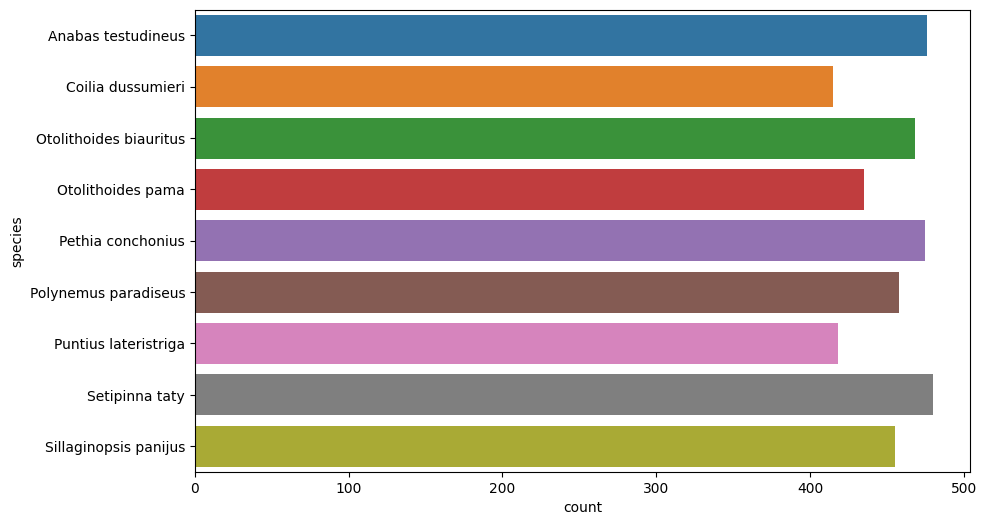

In [5]:
plt.figure(figsize=[10,6])
sns.countplot(y='species',data=df,orient='h')
plt.show()


<Axes: title={'center': 'Correlation Map'}>

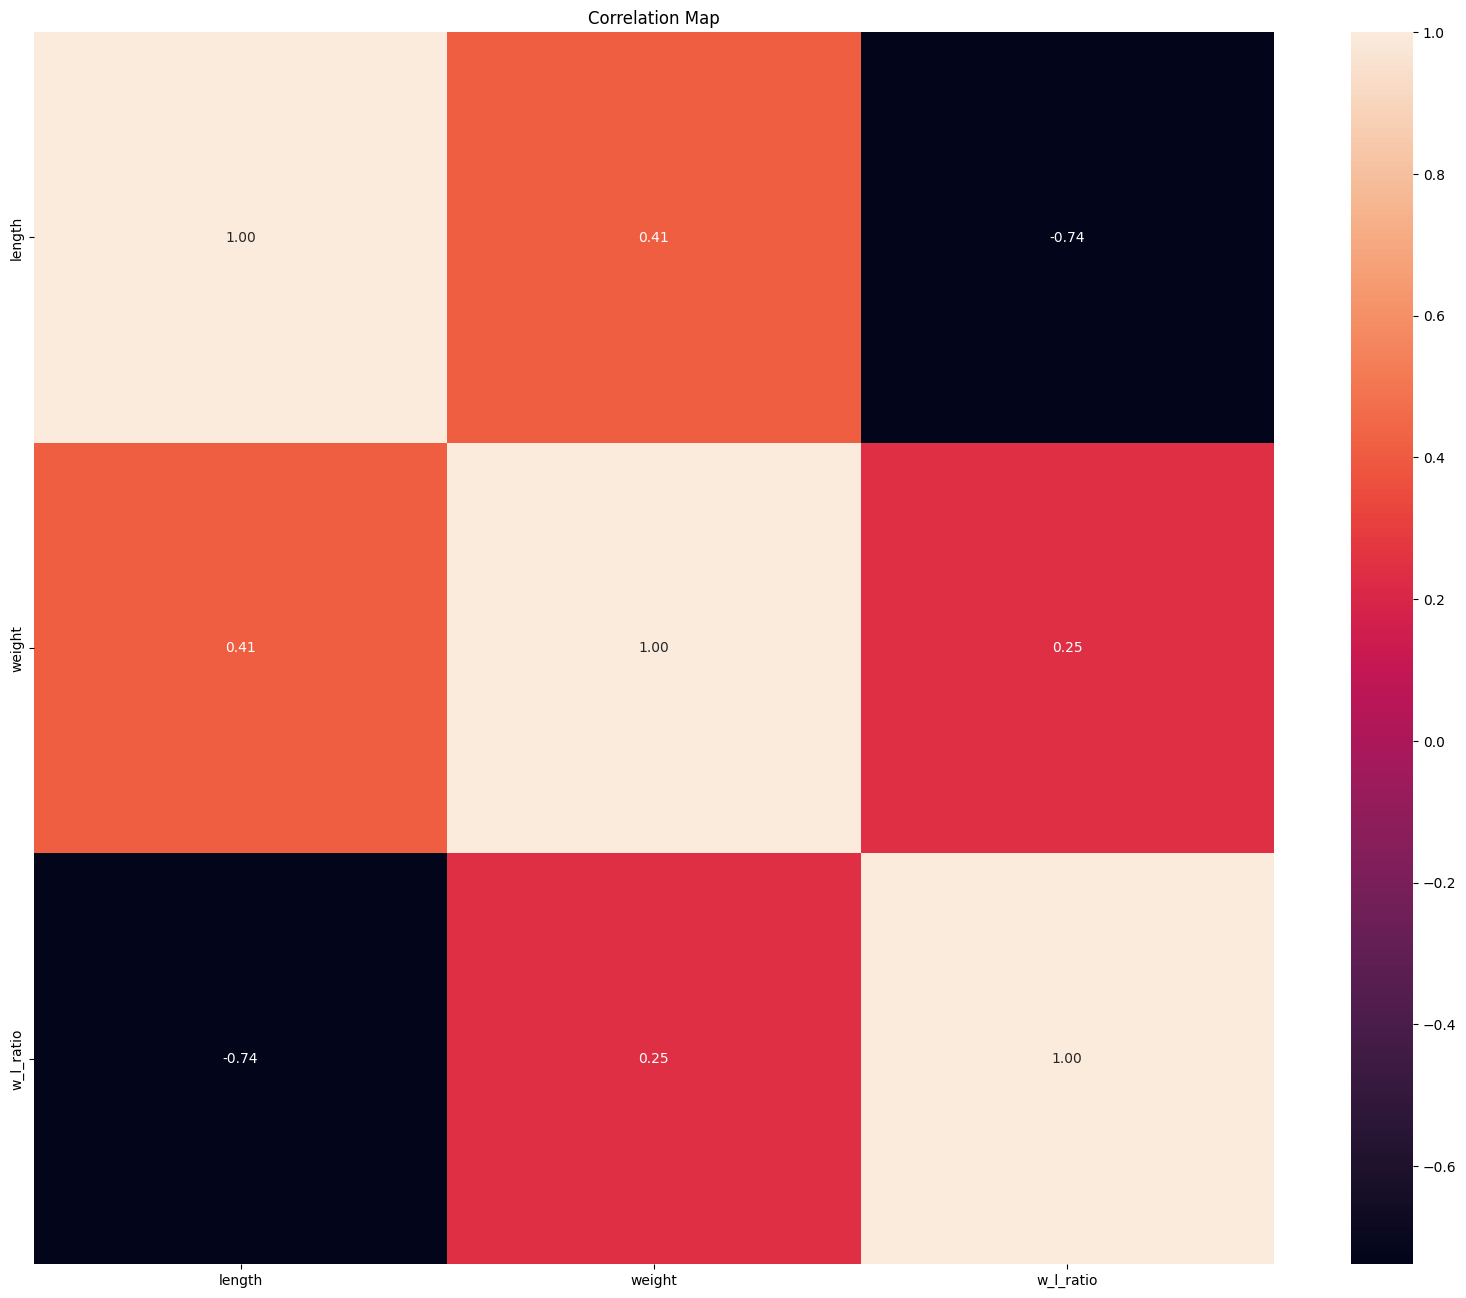

In [6]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(20,16))
plt.title("Correlation Map")
sns.heatmap(numeric_df.corr(),annot=True, fmt='.2f')

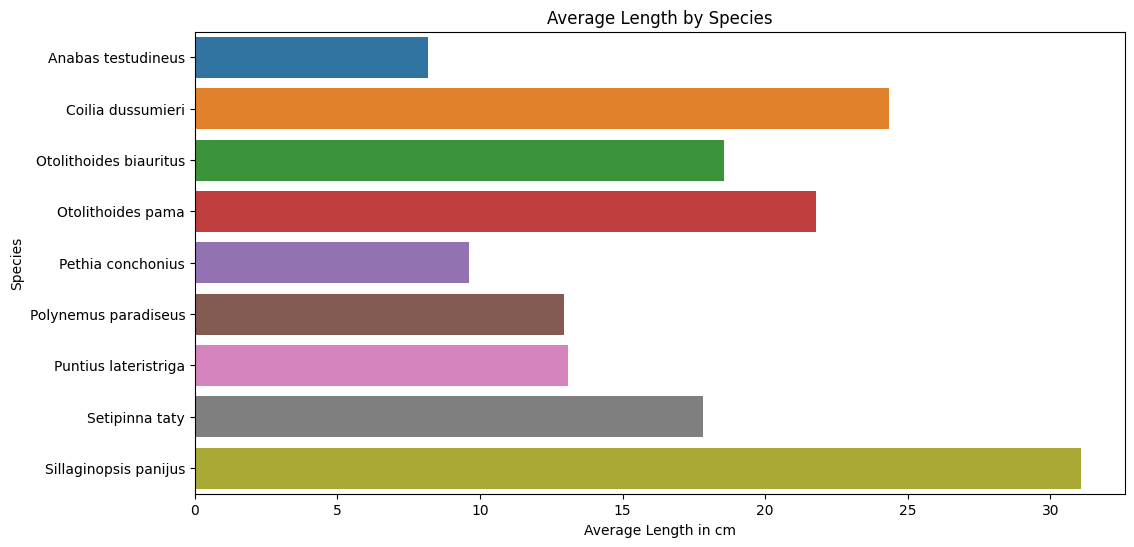

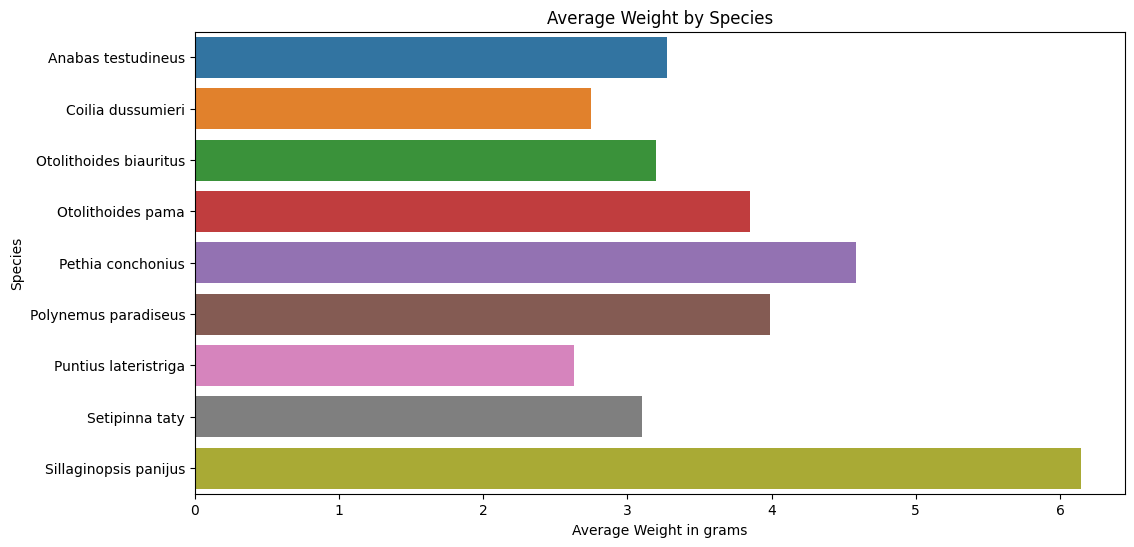

In [7]:
speclen=df.groupby("species")['length'].mean().reset_index()

plt.figure(figsize = (12,6))
sns.barplot(y = "species", x = "length",data = speclen,orient='h')
plt.title('Average Length by Species')
plt.ylabel('Species')
plt.xlabel('Average Length in cm')
plt.xticks(rotation=0)
plt.show()




specweight=df.groupby("species")['weight'].mean().reset_index()

plt.figure(figsize = (12,6))
sns.barplot(y = "species", x = "weight",data = specweight,orient='h')
plt.title('Average Weight by Species')
plt.ylabel('Species')
plt.xlabel('Average Weight in grams')
plt.xticks(rotation=0)
plt.show()

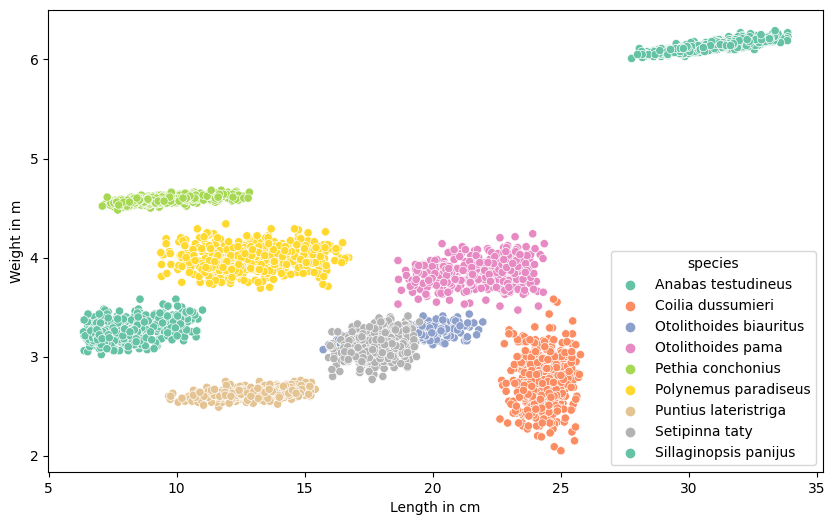

In [8]:
plt.figure(figsize=[10,6])
sns.scatterplot(x='length',y='weight',data=df,hue='species',palette="Set2")
plt.xlabel('Length in cm')
plt.ylabel('Weight in m')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


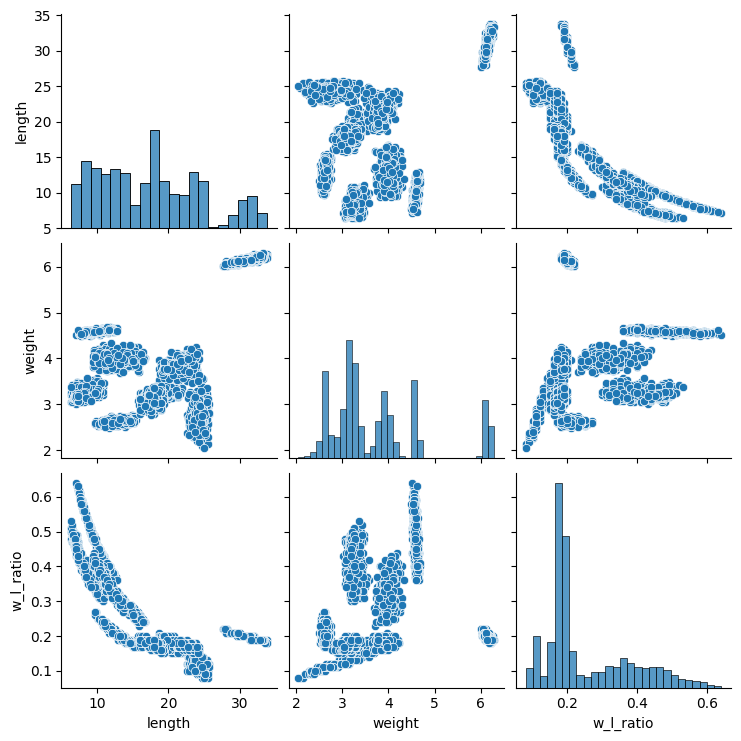

In [9]:
sns.pairplot(df, vars=df.columns[1:])
plt.show()

**Prediction Using Three Different Models**
=

In [10]:
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

In [11]:
X = df.drop(columns=['species']) 
y = df['species']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'Decision Tree': DecisionTreeClassifier(),
}

In [12]:
results=[]

for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Collect performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')  
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # Store results in a dictionary
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
results_df = pd.DataFrame(results)

# Display the DataFrame for comparison
print(results_df)

                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.908088   0.934487  0.909188  0.901594
1        Random Forest  0.936275   0.939474  0.939585  0.939458
2              XGBoost  0.920343   0.924301  0.924371  0.924300
3        Decision Tree  0.927696   0.931284  0.931368  0.931288


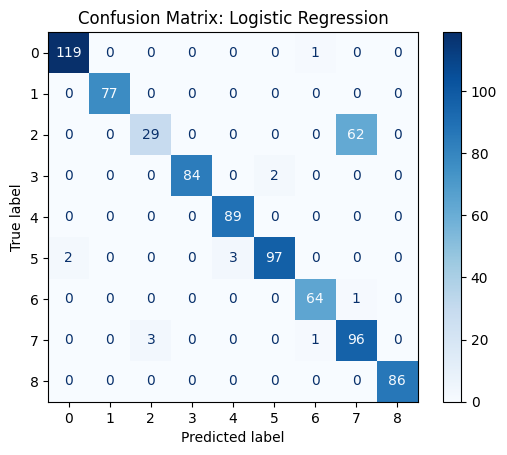

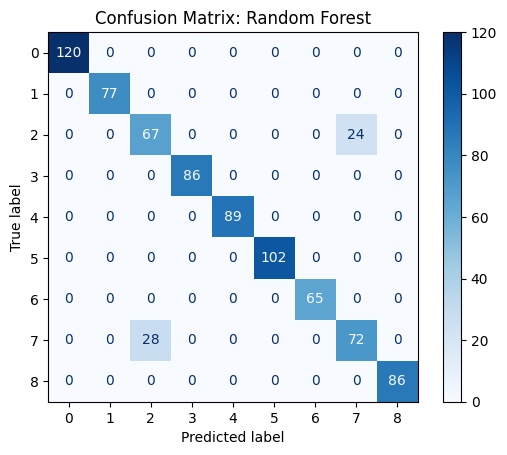

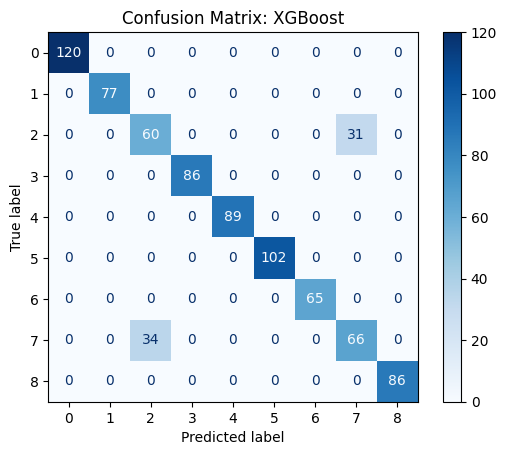

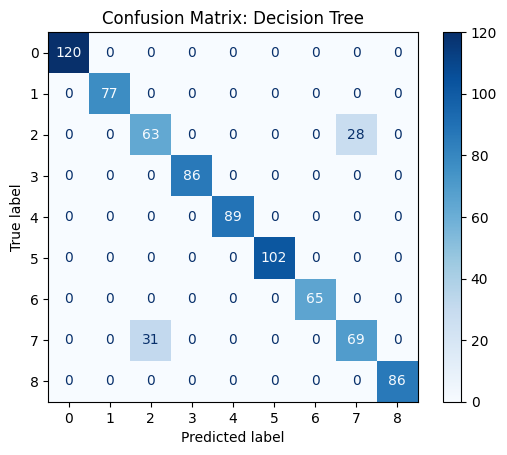

In [14]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    # Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix: {name}")
    plt.show()

**Testing a Random Search**
=

In [15]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt'],
    'bootstrap': [True, False]
}


from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(random_state=42,class_weight='balanced') 

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                                   n_iter=100, cv=5, random_state=42, n_jobs=-1, verbose=2)


# Fit the random search to the data
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.7s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimat

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, None],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, verbose=2)

In [16]:
rfmodelforestrandom = random_search.best_estimator_

rfmodelforestrandom.fit(X_train, y_train)

# Make predictions on the test data
ypredforestrandom = rfmodelforestrandom.predict(X_test)

In [17]:
print("Accuracy Score with Random Forest Random Search:", accuracy_score(y_test, ypredforestrandom))
print("\nRandom Forest Report (Random) :")
print(classification_report(y_test, ypredforestrandom))

Accuracy Score with Random Forest Random Search: 0.9276960784313726

Random Forest Report (Random) :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       1.00      1.00      1.00        77
           2       0.65      0.77      0.70        91
           3       1.00      1.00      1.00        86
           4       1.00      1.00      1.00        89
           5       1.00      1.00      1.00       102
           6       1.00      1.00      1.00        65
           7       0.75      0.62      0.68       100
           8       1.00      1.00      1.00        86

    accuracy                           0.93       816
   macro avg       0.93      0.93      0.93       816
weighted avg       0.93      0.93      0.93       816



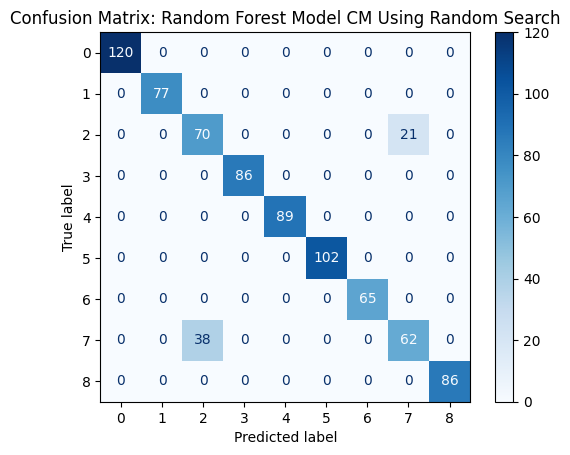

In [18]:
cm_forestrandom = confusion_matrix(y_test, ypredforestrandom)
disp_logistic3 = ConfusionMatrixDisplay(confusion_matrix=cm_forestrandom)
disp_logistic3.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: Random Forest Model CM Using Random Search")
plt.show()

**Testing a Grid Search**
=

In [19]:
param_grid2 = {
    'n_estimators': [200, 300, 400],
    'max_depth': [20, 30, 40],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}
    
    
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid2, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [20, 30, 40],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [200, 300, 400]},
             verbose=2)

In [20]:
rfmodelforestgrid = grid_search.best_estimator_
# Fit the model on the training data
rfmodelforestgrid.fit(X_train, y_train)

# Make predictions on the test data
ypredforestgrid = rfmodelforestgrid.predict(X_test)

In [21]:
print("Accuracy Score with Random Forest and Grid:", accuracy_score(y_test, ypredforestgrid))
print("\nRandom Forest (Grid) Report :")
print(classification_report(y_test, ypredforestgrid))

Accuracy Score with Random Forest and Grid: 0.9375

Random Forest (Grid) Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       1.00      1.00      1.00        77
           2       0.71      0.74      0.72        91
           3       1.00      1.00      1.00        86
           4       1.00      1.00      1.00        89
           5       1.00      1.00      1.00       102
           6       1.00      1.00      1.00        65
           7       0.75      0.73      0.74       100
           8       1.00      1.00      1.00        86

    accuracy                           0.94       816
   macro avg       0.94      0.94      0.94       816
weighted avg       0.94      0.94      0.94       816



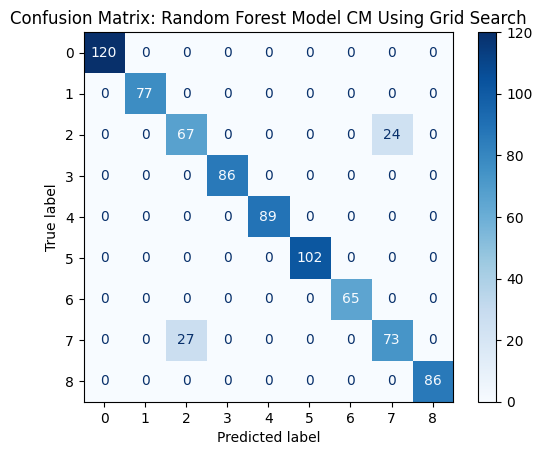

In [22]:
cm_forestgrid = confusion_matrix(y_test, ypredforestgrid)
disp_logistic3 = ConfusionMatrixDisplay(confusion_matrix=cm_forestgrid)
disp_logistic3.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: Random Forest Model CM Using Grid Search")
plt.show()

From these tests, it can be concluded that the best model for classifying fish is the Random Search-Tuned Random Forest Model. 

**Conclusion**
=

Thanks for viewing my notebook. In this book, I checked for a relationship between length and weight of a fish, and found different clusters of species of fish in a scatterplot. 


I also saw that one bar graph with species with the highest average length was very similar to the bar graph with species with the heighest average weight. The Sillaginopsis panijus dominates in terms of length and weight, followed by the Setipinna taty.


In the original comparison of models, the Random Forest Model turned out to have the highest accuracy of 93.6%. So, I tuned the model using Grid Search hyperparameter tuning, and achieved a slightly higher accuracy of 93.8%. Between the original and tuned model, the f1 increased significantly in predicting one particular species of fish (≈6% improvement).


If you enjoyed reading this notebook, please consider giving it an upvote. More is to come from me, as I aspire to learn clustering algorithms as of now.